In [1]:
%matplotlib inline
#data manipulation
import numpy as np
import pandas as pd
#python imports
import math,time,random,datetime
#data visualisation
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')
#preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize
#machine learning
from sklearn.model_selection import train_test_split
from sklearn import model_selection,tree,preprocessing,metrics
#from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
sample_submission=pd.read_csv('sample_submission.csv')

In [3]:
train.head()

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
0,BRAE2NF6JA5GUEXG,37.0,2015-08-22 18:36:12.000,2,Lillyann,Yes,Fashion,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700
1,TUNE8SFB6RJN2HSD,38.0,2016-03-27 21:19:13.000,24,Klynn,Yes,Fashion,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256
2,BRAEAR7WZPQGPBZU,9.0,2015-08-18 19:25:22.000,447,Ridge,Yes,Child_care,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362
3,WATDZ2ZQ8JPDHCTJ,50.0,2016-03-28 21:53:01.000,23,Abran,Yes,Educational,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824
4,JWSEBUKYQPMBZ3RK,7.0,2016-03-29 22:58:53.000,63,Dustyn,Yes,Repair,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935


In [4]:
train.Customer_name.value_counts()

Teagan     2
Amaree     2
Salem      2
Syncere    2
Cree       2
          ..
Tyree      1
Naomi      1
Jayla      1
Sven       1
Ariya      1
Name: Customer_name, Length: 5900, dtype: int64

In [5]:
train.Stall_no.value_counts()

20.0    165
2.0     152
32.0    146
14.0    145
31.0    144
25.0    142
41.0    138
9.0     137
23.0    136
37.0    135
16.0    135
28.0    134
7.0     133
15.0    133
33.0    132
12.0    132
17.0    132
34.0    131
19.0    130
5.0     129
3.0     129
1.0     128
46.0    127
11.0    126
48.0    126
44.0    126
30.0    126
36.0    126
24.0    126
42.0    124
27.0    124
26.0    123
40.0    123
18.0    123
50.0    122
43.0    122
47.0    121
29.0    120
4.0     120
39.0    120
35.0    119
10.0    118
22.0    117
6.0     117
45.0    116
49.0    111
38.0    111
21.0    109
8.0     106
13.0     96
Name: Stall_no, dtype: int64

In [6]:
test.head()

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price
0,SCHE4YSTDVPVZVXW,39.0,2016-01-13 07:45:08.000,205,Ivanka,No,Fashion,0,90,0,380.0,16.0,2576.0,3340
1,ACCEGCATKHNRXUHW,49.0,2015-08-23 20:37:05.000,3,Isaak,Yes,Fashion,0,87,0,393.0,16.0,1202.0,1955
2,NKCE6GJ5XVJDXNNZ,1.0,2015-11-14 18:12:39.000,183,Analiese,No,Technology,2,55,0,493.0,9.0,7175.0,15715
3,NKCEB8BK3ZXDHDHM,8.0,2015-11-21 04:56:19.000,358,Rusty,Yes,Child_care,3,86,0,303.0,16.0,5404.0,13078
4,TOPEFDXSAHRNPF94,33.0,2015-05-06 15:09:46.000,167,Eloise,No,Technology,0,27,0,567.0,16.0,4069.0,6244


In [7]:
sample_submission.head()

,Product_id,Selling_Price
0,SCHE4YSTDVPVZVXW,3294.594688
1,ACCEGCATKHNRXUHW,1945.603968
2,NKCE6GJ5XVJDXNNZ,11871.830880
3,NKCEB8BK3ZXDHDHM,9421.143424
4,TOPEFDXSAHRNPF94,5717.420625


In [8]:
len(train)

6368

In [9]:
len(test)

3430

In [10]:
train.describe()

,Stall_no,Market_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
count,6363.000000,6368.000000,6368.000000,6368.000000,6330.000000,6170.000000,6163.000000,6330.000000,6025.000000,6327.000000
mean,25.309445,199.340609,0.643687,50.921168,0.140442,264.514100,10.146195,3531.349763,6432.545892,4563.242592
std,14.328980,170.275570,1.025092,29.091922,0.347473,124.483056,4.318339,2194.729604,3716.177364,2979.102408
min,1.000000,0.000000,0.000000,1.000000,0.000000,100.000000,1.000000,1.000000,404.000000,-6062.470000
25%,13.000000,55.000000,0.000000,26.000000,0.000000,163.000000,7.000000,1879.250000,3918.000000,2450.005280
50%,25.000000,132.000000,0.000000,51.000000,0.000000,252.000000,10.000000,3157.500000,5634.000000,4210.384640
75%,37.000000,403.000000,2.000000,76.000000,0.000000,314.000000,14.000000,4697.000000,8126.000000,6167.643252
max,50.000000,471.000000,3.000000,100.000000,1.000000,649.000000,17.000000,17580.000000,58812.000000,22638.325941


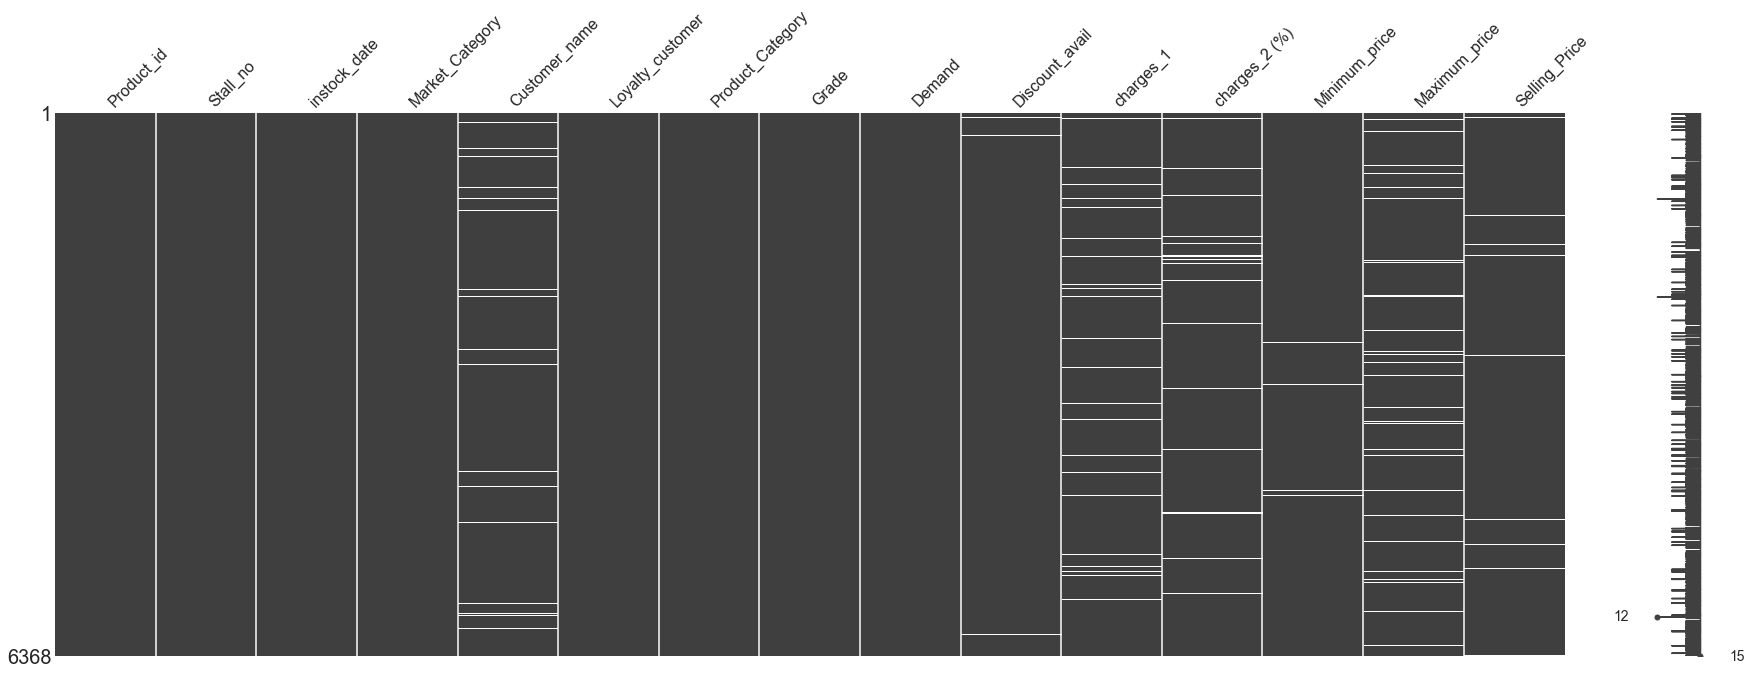

In [11]:
#checking where the missing values exist in train data
import missingno
missingno.matrix(train, figsize=(30,10))

In [12]:
def find_missing_values(df, columns):
    missing_val={}
    df_length=len(train)
    for column in columns:
        total_column_values=df[column].value_counts().sum()
        missing_val[column]=df_length-total_column_values
    return missing_val
missing_values=find_missing_values(train,train.columns)
missing_values

{'Product_id': 0,
 'Stall_no': 5,
 'instock_date': 0,
 'Market_Category': 0,
 'Customer_name': 211,
 'Loyalty_customer': 0,
 'Product_Category': 0,
 'Grade': 0,
 'Demand': 0,
 'Discount_avail': 38,
 'charges_1': 198,
 'charges_2 (%)': 205,
 'Minimum_price': 38,
 'Maximum_price': 343,
 'Selling_Price': 41}

In [13]:
missing_values=find_missing_values(test,test.columns)
missing_values

{'Product_id': 2938,
 'Stall_no': 2939,
 'instock_date': 2938,
 'Market_Category': 2938,
 'Customer_name': 2991,
 'Loyalty_customer': 2938,
 'Product_Category': 2938,
 'Grade': 2938,
 'Demand': 2938,
 'Discount_avail': 2938,
 'charges_1': 2974,
 'charges_2 (%)': 2943,
 'Minimum_price': 2952,
 'Maximum_price': 2938}

In [14]:
train.columns

Index(['Product_id', 'Stall_no', 'instock_date', 'Market_Category',
       'Customer_name', 'Loyalty_customer', 'Product_Category', 'Grade',
       'Demand', 'Discount_avail', 'charges_1', 'charges_2 (%)',
       'Minimum_price', 'Maximum_price', 'Selling_Price'],
      dtype='object')

In [15]:
train['Loyalty_customer']=np.where(train['Loyalty_customer'] == 'Yes',1,0)

In [16]:
Product_Category_dict = {'Pet_care':1, 'Repair':2, 'Child_care':3, 'Cosmetics':4, 'Hospitality':5, 'Organic':6, 'Technology':7,
                        'Home_decor':8, 'Educational':9, 'Fashion': 0}
train['Product_Category'] = train.Product_Category.map(Product_Category_dict)
train.head()

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
0,BRAE2NF6JA5GUEXG,37.0,2015-08-22 18:36:12.000,2,Lillyann,1,0,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700
1,TUNE8SFB6RJN2HSD,38.0,2016-03-27 21:19:13.000,24,Klynn,1,0,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256
2,BRAEAR7WZPQGPBZU,9.0,2015-08-18 19:25:22.000,447,Ridge,1,3,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362
3,WATDZ2ZQ8JPDHCTJ,50.0,2016-03-28 21:53:01.000,23,Abran,1,9,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824
4,JWSEBUKYQPMBZ3RK,7.0,2016-03-29 22:58:53.000,63,Dustyn,1,2,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935


In [17]:
#train.fillna(np.median,inplace=True)
columns = ['Stall_no', 'Market_Category', 'Loyalty_customer', 'Product_Category', 'Grade',
       'Demand', 'Discount_avail', 'charges_1', 'charges_2 (%)',
       'Minimum_price', 'Maximum_price', 'Selling_Price']
for i in columns:  
    train[i] = train[i].fillna(train[i].median() )

In [18]:
missing_values=find_missing_values(train,train.columns)
missing_values

{'Product_id': 0,
 'Stall_no': 0,
 'instock_date': 0,
 'Market_Category': 0,
 'Customer_name': 211,
 'Loyalty_customer': 0,
 'Product_Category': 0,
 'Grade': 0,
 'Demand': 0,
 'Discount_avail': 0,
 'charges_1': 0,
 'charges_2 (%)': 0,
 'Minimum_price': 0,
 'Maximum_price': 0,
 'Selling_Price': 0}

In [19]:
train.head()

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
0,BRAE2NF6JA5GUEXG,37.0,2015-08-22 18:36:12.000,2,Lillyann,1,0,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700
1,TUNE8SFB6RJN2HSD,38.0,2016-03-27 21:19:13.000,24,Klynn,1,0,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256
2,BRAEAR7WZPQGPBZU,9.0,2015-08-18 19:25:22.000,447,Ridge,1,3,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362
3,WATDZ2ZQ8JPDHCTJ,50.0,2016-03-28 21:53:01.000,23,Abran,1,9,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824
4,JWSEBUKYQPMBZ3RK,7.0,2016-03-29 22:58:53.000,63,Dustyn,1,2,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935


In [20]:
train['instock_date'] = pd.to_datetime(train['instock_date'])
train.head()
#print(train['instock_date'].dt.time)

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
0,BRAE2NF6JA5GUEXG,37.0,2015-08-22 18:36:12,2,Lillyann,1,0,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700
1,TUNE8SFB6RJN2HSD,38.0,2016-03-27 21:19:13,24,Klynn,1,0,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256
2,BRAEAR7WZPQGPBZU,9.0,2015-08-18 19:25:22,447,Ridge,1,3,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362
3,WATDZ2ZQ8JPDHCTJ,50.0,2016-03-28 21:53:01,23,Abran,1,9,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824
4,JWSEBUKYQPMBZ3RK,7.0,2016-03-29 22:58:53,63,Dustyn,1,2,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935


In [21]:
train_df = pd.DataFrame()
train_df['Stall_no'] = train['Stall_no']
train_df['Market_Category'] = train['Market_Category']
train_df['Loyalty_customer'] = train['Loyalty_customer']
train_df['Product_Category'] = train['Product_Category']
train_df['Grade'] = train['Grade']
train_df['Demand'] = train['Demand']
train_df['Discount_avail'] = train['Discount_avail']
train_df['charges_1'] = train['charges_1']
train_df['charges_2 (%)'] = train['charges_2 (%)']
train_df['Minimum_price'] = train['Minimum_price']
train_df['Maximum_price'] = train['Maximum_price']
train_df.head()

,Stall_no,Market_Category,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price
0,37.0,2,1,0,1,68,0.0,376.0,11.0,2983.0,4713.0
1,38.0,24,1,0,0,51,0.0,397.0,12.0,7495.0,10352.0
2,9.0,447,1,3,0,10,0.0,250.0,9.0,5752.0,7309.0
3,50.0,23,1,9,2,48,0.0,144.0,13.0,5090.0,20814.0
4,7.0,63,1,2,1,35,1.0,211.0,4.0,2430.0,9261.0


In [22]:
train_df['instock_year'] = train['instock_date'].dt.year
train_df['instock_month'] = train['instock_date'].dt.month
train_df['instock_day'] = train['instock_date'].dt.day
train_df['instock_hour'] = train['instock_date'].dt.hour
train_df['instock_minute'] = train['instock_date'].dt.minute
train_df.head()

,Stall_no,Market_Category,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,instock_year,instock_month,instock_day,instock_hour,instock_minute
0,37.0,2,1,0,1,68,0.0,376.0,11.0,2983.0,4713.0,2015,8,22,18,36
1,38.0,24,1,0,0,51,0.0,397.0,12.0,7495.0,10352.0,2016,3,27,21,19
2,9.0,447,1,3,0,10,0.0,250.0,9.0,5752.0,7309.0,2015,8,18,19,25
3,50.0,23,1,9,2,48,0.0,144.0,13.0,5090.0,20814.0,2016,3,28,21,53
4,7.0,63,1,2,1,35,1.0,211.0,4.0,2430.0,9261.0,2016,3,29,22,58


In [23]:
train_df['instock_year'].value_counts()

2015    4216
2016    2093
2014      59
Name: instock_year, dtype: int64

In [24]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit([2014,2015,2016])
train_df['instock_year']=le.transform(train_df['instock_year'])

In [25]:
train_df.head()

,Stall_no,Market_Category,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,instock_year,instock_month,instock_day,instock_hour,instock_minute
0,37.0,2,1,0,1,68,0.0,376.0,11.0,2983.0,4713.0,1,8,22,18,36
1,38.0,24,1,0,0,51,0.0,397.0,12.0,7495.0,10352.0,2,3,27,21,19
2,9.0,447,1,3,0,10,0.0,250.0,9.0,5752.0,7309.0,1,8,18,19,25
3,50.0,23,1,9,2,48,0.0,144.0,13.0,5090.0,20814.0,2,3,28,21,53
4,7.0,63,1,2,1,35,1.0,211.0,4.0,2430.0,9261.0,2,3,29,22,58


In [26]:
train_df.columns

Index(['Stall_no', 'Market_Category', 'Loyalty_customer', 'Product_Category',
       'Grade', 'Demand', 'Discount_avail', 'charges_1', 'charges_2 (%)',
       'Minimum_price', 'Maximum_price', 'instock_year', 'instock_month',
       'instock_day', 'instock_hour', 'instock_minute'],
      dtype='object')

In [27]:
train_df.skew()

Stall_no            0.005098
Market_Category     0.460864
Loyalty_customer   -0.452863
Product_Category    0.045117
Grade               1.195235
Demand             -0.014547
Discount_avail      2.080240
charges_1           1.119731
charges_2 (%)      -0.135805
Minimum_price       1.165180
Maximum_price       1.869425
instock_year        0.530371
instock_month      -0.091527
instock_day        -0.414408
instock_hour       -0.588950
instock_minute      0.322915
dtype: float64

In [28]:
len(train_df)

6368

In [29]:
train_df['Grade'] = np.log1p(train_df['Grade'])
print(train_df['Grade'].skew())

0.9847528410989904


In [30]:
train_df['Discount_avail'] = np.log1p(train_df['Discount_avail'])
print(train_df['Discount_avail'].skew())

2.0802401430886803


In [31]:
train_df['charges_1'] = np.log1p(train_df['charges_1'])
print(train_df['charges_1'].skew())

0.010830707131975169


In [32]:
train_df['Minimum_price'] = np.log1p(train_df['Minimum_price'])
print(train_df['Minimum_price'].skew())

-0.9118454447475552


In [33]:
train_df['Maximum_price'] = np.log1p(train_df['Maximum_price'])
print(train_df['Maximum_price'].skew())

-0.6383064891772168


In [34]:
train_df.describe()

,Stall_no,Market_Category,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,instock_year,instock_month,instock_day,instock_hour,instock_minute
count,6368.000000,6368.000000,6368.000000,6368.000000,6368.000000,6368.000000,6368.000000,6368.000000,6368.000000,6368.000000,6368.000000,6368.000000,6368.000000,6368.000000,6368.000000,6368.000000
mean,25.309202,199.340609,0.610396,4.436244,0.341481,50.921168,0.096766,5.479697,10.141489,7.953194,8.609602,1.319410,6.409862,17.892117,13.756438,28.077889
std,14.323355,170.275570,0.487699,2.851382,0.522817,29.091922,0.240247,0.449707,4.248329,0.717893,0.579026,0.485751,3.326065,8.067962,6.895496,16.711530
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.615121,1.000000,0.693147,6.003887,0.000000,1.000000,1.000000,0.000000,0.000000
25%,13.000000,55.000000,0.000000,2.000000,0.000000,26.000000,0.000000,5.117994,7.000000,7.542081,8.299162,1.000000,3.000000,9.000000,7.000000,15.000000
50%,25.000000,132.000000,1.000000,4.000000,0.000000,51.000000,0.000000,5.533389,10.000000,8.057853,8.636752,1.000000,8.000000,20.000000,15.000000,25.000000
75%,37.000000,403.000000,1.000000,7.000000,1.098612,76.000000,0.000000,5.737377,14.000000,8.453614,8.978251,2.000000,9.000000,24.000000,19.000000,41.000000
max,50.000000,471.000000,1.000000,9.000000,1.386294,100.000000,0.693147,6.476972,17.000000,9.774574,10.982118,2.000000,12.000000,31.000000,23.000000,59.000000


In [35]:
train_df.head()

,Stall_no,Market_Category,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,instock_year,instock_month,instock_day,instock_hour,instock_minute
0,37.0,2,1,0,0.693147,68,0.000000,5.932245,11.0,8.001020,8.458292,1,8,22,18,36
1,38.0,24,1,0,0.000000,51,0.000000,5.986452,12.0,8.922125,9.245032,2,3,27,21,19
2,9.0,447,1,3,0.000000,10,0.000000,5.525453,9.0,8.657477,8.896999,1,8,18,19,25
3,50.0,23,1,9,1.098612,48,0.000000,4.976734,13.0,8.535230,9.943429,2,3,28,21,53
4,7.0,63,1,2,0.693147,35,0.693147,5.356586,4.0,7.796058,9.133675,2,3,29,22,58


In [36]:
train_df.columns

Index(['Stall_no', 'Market_Category', 'Loyalty_customer', 'Product_Category',
       'Grade', 'Demand', 'Discount_avail', 'charges_1', 'charges_2 (%)',
       'Minimum_price', 'Maximum_price', 'instock_year', 'instock_month',
       'instock_day', 'instock_hour', 'instock_minute'],
      dtype='object')

In [37]:
train_df.head()

,Stall_no,Market_Category,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,instock_year,instock_month,instock_day,instock_hour,instock_minute
0,37.0,2,1,0,0.693147,68,0.000000,5.932245,11.0,8.001020,8.458292,1,8,22,18,36
1,38.0,24,1,0,0.000000,51,0.000000,5.986452,12.0,8.922125,9.245032,2,3,27,21,19
2,9.0,447,1,3,0.000000,10,0.000000,5.525453,9.0,8.657477,8.896999,1,8,18,19,25
3,50.0,23,1,9,1.098612,48,0.000000,4.976734,13.0,8.535230,9.943429,2,3,28,21,53
4,7.0,63,1,2,0.693147,35,0.693147,5.356586,4.0,7.796058,9.133675,2,3,29,22,58


In [38]:
y_train = pd.DataFrame()
y_train['Selling_Price'] = train['Selling_Price']
y_train.head()

,Selling_Price
0,4185.947700
1,9271.490256
2,6785.701362
3,13028.917824
4,906.553935


In [39]:
y_train.skew()

Selling_Price    0.855574
dtype: float64

In [40]:
#y_train[['Selling_Price']] = scaler.fit_transform(train[['Selling_Price']])

In [41]:
#from sklearn.linear_model import LinearRegression

In [42]:
#from sklearn import tree
#clf = tree.DecisionTreeRegressor()
#pred = clf.fit(train_df, y_train)

In [43]:
from sklearn.ensemble import GradientBoostingRegressor
clf = GradientBoostingRegressor(random_state=0)
pred = clf.fit(train_df, y_train)

In [44]:
acc = round(clf.score(train_df,y_train)*100,2)
train_pred=model_selection.cross_val_predict(clf,train_df,y_train,cv=10,n_jobs=-1)
print("Accuracy: %s" % acc) 

Accuracy: 97.1


In [45]:
wanted_test_columns=train.drop('Selling_Price',axis=1).columns
wanted_test_columns

Index(['Product_id', 'Stall_no', 'instock_date', 'Market_Category',
       'Customer_name', 'Loyalty_customer', 'Product_Category', 'Grade',
       'Demand', 'Discount_avail', 'charges_1', 'charges_2 (%)',
       'Minimum_price', 'Maximum_price'],
      dtype='object')

In [46]:
test.head()

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price
0,SCHE4YSTDVPVZVXW,39.0,2016-01-13 07:45:08.000,205,Ivanka,No,Fashion,0,90,0,380.0,16.0,2576.0,3340
1,ACCEGCATKHNRXUHW,49.0,2015-08-23 20:37:05.000,3,Isaak,Yes,Fashion,0,87,0,393.0,16.0,1202.0,1955
2,NKCE6GJ5XVJDXNNZ,1.0,2015-11-14 18:12:39.000,183,Analiese,No,Technology,2,55,0,493.0,9.0,7175.0,15715
3,NKCEB8BK3ZXDHDHM,8.0,2015-11-21 04:56:19.000,358,Rusty,Yes,Child_care,3,86,0,303.0,16.0,5404.0,13078
4,TOPEFDXSAHRNPF94,33.0,2015-05-06 15:09:46.000,167,Eloise,No,Technology,0,27,0,567.0,16.0,4069.0,6244


In [47]:
missing_values=find_missing_values(test,test.columns)
missing_values

{'Product_id': 2938,
 'Stall_no': 2939,
 'instock_date': 2938,
 'Market_Category': 2938,
 'Customer_name': 2991,
 'Loyalty_customer': 2938,
 'Product_Category': 2938,
 'Grade': 2938,
 'Demand': 2938,
 'Discount_avail': 2938,
 'charges_1': 2974,
 'charges_2 (%)': 2943,
 'Minimum_price': 2952,
 'Maximum_price': 2938}

In [48]:
test['Loyalty_customer']=np.where(test['Loyalty_customer'] == 'Yes',1,0)

In [49]:
Product_Category_dict = {'Pet_care':1, 'Repair':2, 'Child_care':3, 'Cosmetics':4, 'Hospitality':5, 'Organic':6, 'Technology':7,
                        'Home_decor':8, 'Educational':9, 'Fashion': 0}
test['Product_Category'] = test.Product_Category.map(Product_Category_dict)
test.head()

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price
0,SCHE4YSTDVPVZVXW,39.0,2016-01-13 07:45:08.000,205,Ivanka,0,0,0,90,0,380.0,16.0,2576.0,3340
1,ACCEGCATKHNRXUHW,49.0,2015-08-23 20:37:05.000,3,Isaak,1,0,0,87,0,393.0,16.0,1202.0,1955
2,NKCE6GJ5XVJDXNNZ,1.0,2015-11-14 18:12:39.000,183,Analiese,0,7,2,55,0,493.0,9.0,7175.0,15715
3,NKCEB8BK3ZXDHDHM,8.0,2015-11-21 04:56:19.000,358,Rusty,1,3,3,86,0,303.0,16.0,5404.0,13078
4,TOPEFDXSAHRNPF94,33.0,2015-05-06 15:09:46.000,167,Eloise,0,7,0,27,0,567.0,16.0,4069.0,6244


In [50]:
columns = ['Stall_no', 'Market_Category', 'Loyalty_customer', 'Product_Category', 'Grade',
       'Demand', 'Discount_avail', 'charges_1', 'charges_2 (%)',
       'Minimum_price', 'Maximum_price']
for i in columns:  
    test[i] = test[i].fillna(test[i].median() )

In [51]:
#test.dropna(axis=0,inplace=True)
test.head()

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price
0,SCHE4YSTDVPVZVXW,39.0,2016-01-13 07:45:08.000,205,Ivanka,0,0,0,90,0,380.0,16.0,2576.0,3340
1,ACCEGCATKHNRXUHW,49.0,2015-08-23 20:37:05.000,3,Isaak,1,0,0,87,0,393.0,16.0,1202.0,1955
2,NKCE6GJ5XVJDXNNZ,1.0,2015-11-14 18:12:39.000,183,Analiese,0,7,2,55,0,493.0,9.0,7175.0,15715
3,NKCEB8BK3ZXDHDHM,8.0,2015-11-21 04:56:19.000,358,Rusty,1,3,3,86,0,303.0,16.0,5404.0,13078
4,TOPEFDXSAHRNPF94,33.0,2015-05-06 15:09:46.000,167,Eloise,0,7,0,27,0,567.0,16.0,4069.0,6244


In [52]:
pr = pd.DataFrame()
pr['Product_id'] = test['Product_id']
#pr = pr.dropna()
pr.head()

,Product_id
0,SCHE4YSTDVPVZVXW
1,ACCEGCATKHNRXUHW
2,NKCE6GJ5XVJDXNNZ
3,NKCEB8BK3ZXDHDHM
4,TOPEFDXSAHRNPF94


In [53]:
#print(pr.isna()==True)

In [54]:
test.drop(['Product_id'],axis=1,inplace=True)

In [55]:
test['instock_date'] = pd.to_datetime(test['instock_date'])
test['instock_year'] = test['instock_date'].dt.year
test['instock_month'] = test['instock_date'].dt.month
test['instock_day'] = test['instock_date'].dt.day
test['instock_hour'] = test['instock_date'].dt.hour
test['instock_minute'] = test['instock_date'].dt.minute
test.head()

,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,instock_year,instock_month,instock_day,instock_hour,instock_minute
0,39.0,2016-01-13 07:45:08,205,Ivanka,0,0,0,90,0,380.0,16.0,2576.0,3340,2016,1,13,7,45
1,49.0,2015-08-23 20:37:05,3,Isaak,1,0,0,87,0,393.0,16.0,1202.0,1955,2015,8,23,20,37
2,1.0,2015-11-14 18:12:39,183,Analiese,0,7,2,55,0,493.0,9.0,7175.0,15715,2015,11,14,18,12
3,8.0,2015-11-21 04:56:19,358,Rusty,1,3,3,86,0,303.0,16.0,5404.0,13078,2015,11,21,4,56
4,33.0,2015-05-06 15:09:46,167,Eloise,0,7,0,27,0,567.0,16.0,4069.0,6244,2015,5,6,15,9


In [56]:
test.head()

,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,instock_year,instock_month,instock_day,instock_hour,instock_minute
0,39.0,2016-01-13 07:45:08,205,Ivanka,0,0,0,90,0,380.0,16.0,2576.0,3340,2016,1,13,7,45
1,49.0,2015-08-23 20:37:05,3,Isaak,1,0,0,87,0,393.0,16.0,1202.0,1955,2015,8,23,20,37
2,1.0,2015-11-14 18:12:39,183,Analiese,0,7,2,55,0,493.0,9.0,7175.0,15715,2015,11,14,18,12
3,8.0,2015-11-21 04:56:19,358,Rusty,1,3,3,86,0,303.0,16.0,5404.0,13078,2015,11,21,4,56
4,33.0,2015-05-06 15:09:46,167,Eloise,0,7,0,27,0,567.0,16.0,4069.0,6244,2015,5,6,15,9


In [57]:
test.drop(['Customer_name'],axis=1,inplace=True)
test.drop(['instock_date'],axis=1,inplace=True)

In [58]:
test.head()

,Stall_no,Market_Category,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,instock_year,instock_month,instock_day,instock_hour,instock_minute
0,39.0,205,0,0,0,90,0,380.0,16.0,2576.0,3340,2016,1,13,7,45
1,49.0,3,1,0,0,87,0,393.0,16.0,1202.0,1955,2015,8,23,20,37
2,1.0,183,0,7,2,55,0,493.0,9.0,7175.0,15715,2015,11,14,18,12
3,8.0,358,1,3,3,86,0,303.0,16.0,5404.0,13078,2015,11,21,4,56
4,33.0,167,0,7,0,27,0,567.0,16.0,4069.0,6244,2015,5,6,15,9


In [59]:
test['instock_year'].value_counts()

2015    2282
2016    1110
2014      38
Name: instock_year, dtype: int64

In [60]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit([2014,2015,2016])
test['instock_year']=le.transform(test['instock_year'])
test.head()

,Stall_no,Market_Category,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,instock_year,instock_month,instock_day,instock_hour,instock_minute
0,39.0,205,0,0,0,90,0,380.0,16.0,2576.0,3340,2,1,13,7,45
1,49.0,3,1,0,0,87,0,393.0,16.0,1202.0,1955,1,8,23,20,37
2,1.0,183,0,7,2,55,0,493.0,9.0,7175.0,15715,1,11,14,18,12
3,8.0,358,1,3,3,86,0,303.0,16.0,5404.0,13078,1,11,21,4,56
4,33.0,167,0,7,0,27,0,567.0,16.0,4069.0,6244,1,5,6,15,9


In [61]:
test.skew()

Stall_no           -0.014966
Market_Category     0.493435
Loyalty_customer   -0.444594
Product_Category    0.011619
Grade               1.154309
Demand              0.022957
Discount_avail      2.001905
charges_1           1.048848
charges_2 (%)      -0.220078
Minimum_price       1.217134
Maximum_price       1.359294
instock_year        0.518309
instock_month      -0.101606
instock_day        -0.423523
instock_hour       -0.604393
instock_minute      0.303380
dtype: float64

In [62]:
test['Grade'] = np.log1p(test['Grade'])
print(test['Grade'].skew())

0.9476018981033806


In [63]:
test['Discount_avail'] = np.log1p(test['Discount_avail'])
print(test['Discount_avail'].skew())

2.001904662662307


In [64]:
test['charges_1'] = np.log1p(test['charges_1'])
print(test['charges_1'].skew())

-0.011403091070354072


In [65]:
test['Minimum_price'] = np.log1p(test['Minimum_price'])
print(test['Minimum_price'].skew())

-0.8099729880298642


In [66]:
test.head()

,Stall_no,Market_Category,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,instock_year,instock_month,instock_day,instock_hour,instock_minute
0,39.0,205,0,0,0.000000,90,0.0,5.942799,16.0,7.854381,3340,2,1,13,7,45
1,49.0,3,1,0,0.000000,87,0.0,5.976351,16.0,7.092574,1955,1,8,23,20,37
2,1.0,183,0,7,1.098612,55,0.0,6.202536,9.0,8.878497,15715,1,11,14,18,12
3,8.0,358,1,3,1.386294,86,0.0,5.717028,16.0,8.595080,13078,1,11,21,4,56
4,33.0,167,0,7,0.000000,27,0.0,6.342121,16.0,8.311398,6244,1,5,6,15,9


In [67]:
test['Maximum_price'] = np.log1p(test['Maximum_price'])
print(test['Maximum_price'].skew())

-0.7109693019800292


In [68]:
test.head()

,Stall_no,Market_Category,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,instock_year,instock_month,instock_day,instock_hour,instock_minute
0,39.0,205,0,0,0.000000,90,0.0,5.942799,16.0,7.854381,8.114025,2,1,13,7,45
1,49.0,3,1,0,0.000000,87,0.0,5.976351,16.0,7.092574,7.578657,1,8,23,20,37
2,1.0,183,0,7,1.098612,55,0.0,6.202536,9.0,8.878497,9.662435,1,11,14,18,12
3,8.0,358,1,3,1.386294,86,0.0,5.717028,16.0,8.595080,9.478763,1,11,21,4,56
4,33.0,167,0,7,0.000000,27,0.0,6.342121,16.0,8.311398,8.739536,1,5,6,15,9


In [69]:
predictions=clf.predict(test)

In [70]:
predictions

array([ 3357.9539684 ,  2001.77683081, 11611.49233538, ...,
        6725.66524148,  3430.66719441,  1038.30403575])

In [71]:
#predictions = np.clip(predictions, a_min =[0], a_max = None) 

In [72]:
#predictions = 10**predictions
predictions

array([ 3357.9539684 ,  2001.77683081, 11611.49233538, ...,
        6725.66524148,  3430.66719441,  1038.30403575])

In [73]:
submission=pd.DataFrame()
submission['Product_id']=pr['Product_id']
submission['Selling_price']=predictions
#submission.dropna()
submission = submission.reindex(columns=['Product_id', 'Selling_Price'])
submission['Selling_Price']=predictions
submission.head()

,Product_id,Selling_Price
0,SCHE4YSTDVPVZVXW,3357.953968
1,ACCEGCATKHNRXUHW,2001.776831
2,NKCE6GJ5XVJDXNNZ,11611.492335
3,NKCEB8BK3ZXDHDHM,9623.521794
4,TOPEFDXSAHRNPF94,5754.625935


In [74]:
submission.to_csv('Desktop/Hackerearth/submission.csv',index=False)
print("submission is ready")

submission is ready


In [75]:
submission_check=pd.read_csv('Desktop/Hackerearth/submission.csv')

In [76]:
submission_check.shape

(3430, 2)

In [77]:
submission.head()

,Product_id,Selling_Price
0,SCHE4YSTDVPVZVXW,3357.953968
1,ACCEGCATKHNRXUHW,2001.776831
2,NKCE6GJ5XVJDXNNZ,11611.492335
3,NKCEB8BK3ZXDHDHM,9623.521794
4,TOPEFDXSAHRNPF94,5754.625935


In [78]:
sample_submission.head()

,Product_id,Selling_Price
0,SCHE4YSTDVPVZVXW,3294.594688
1,ACCEGCATKHNRXUHW,1945.603968
2,NKCE6GJ5XVJDXNNZ,11871.830880
3,NKCEB8BK3ZXDHDHM,9421.143424
4,TOPEFDXSAHRNPF94,5717.420625
